## ISM 6136 Data Mining- Project
Submission to - Prof. Mohammadreza Ebrahimi

Project by - Simran Agichani, Rishabh Singh, Akash Thallada

In [2]:
import numpy as np
import pandas as pd

#reading dataset into dataframe
df = pd.read_csv('C:/Users/simra/Downloads/weatherAUS.csv')

#seeing how our dataset looks like using first five rows
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Seeing the dimension of our data

In [3]:
#(rows, columns)
print('(rows, columns) ->', df.shape)
print('\n')
#to check datatypes of columns
df.info()

(rows, columns) -> (145460, 23)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Here using describe, info and head, we notice that the columns with datatype float64 are numerical whereas the one with object datatype are categorical
Let's check the unique values in the categorical columns - Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow

In [5]:
for column in df:
    if df[column].dtype == 'object':
        print('Unique values in ' + column + ' are->', len(df[column].unique()))

Unique values in Date are-> 3436
Unique values in Location are-> 49
Unique values in WindGustDir are-> 17
Unique values in WindDir9am are-> 17
Unique values in WindDir3pm are-> 17
Unique values in RainToday are-> 3
Unique values in RainTomorrow are-> 3


Of all the above, we see that the unique values in date have huge number - 3436 which is high cardinality and hence it will result in poor performance of our algorithm
To reduce the cardinality, lets just keep the month part in account and drop date and year

In [6]:
#Converting date to datetime and extracting month out of it
#Adding the month to our dataset
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] = df['Month'].astype(object) #so that all categorical values stay as object datatype
df['Day'] = df['Day'].astype(object)
df.drop('Date',inplace= True,axis=1) #removing date now and using month instead
df['Month'].unique()

array([12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype=object)

In [7]:
#checking if null values are present in rows
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Month                0
Day                  0
dtype: int64

In [8]:
#Removing all rows that have null values in Rain Tomorrow which is our target column
df.dropna(axis=0, how='any', subset=('RainTomorrow',), inplace=True)
df.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
Month                0
Day                  0
dtype: int64

In [9]:
#Dropping columns with more than 50% rows containing null values
df.dropna(axis=1, thresh=df.shape[0]*.5, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [10]:
#Replacing null values in numerical columns with their mean
for column in df:
    if df[column].dtype == 'float64':
        df[column].fillna(value = df[column].mean(), inplace = True)
df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
Month                0
Day                  0
dtype: int64

In [11]:
#Replacing null values in categorical columns with their mode
for column in df:
    if df[column].dtype == 'object':
        df[column].fillna(value = df[column].mode()[0], inplace = True)
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
Day              0
dtype: int64

In [12]:
#Checking the binary distribution over our RainTomorrow target
print(df['RainTomorrow'].value_counts())
df.shape

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


(142193, 24)

In [13]:
#Using label encoder to label all categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,14,...,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0,12,1
1,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,15,...,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0,12,2
2,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,15,...,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0,12,3
3,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,0,...,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,0,12,4
4,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,7,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,12,5


Basic Plots for EDA

<AxesSubplot:>

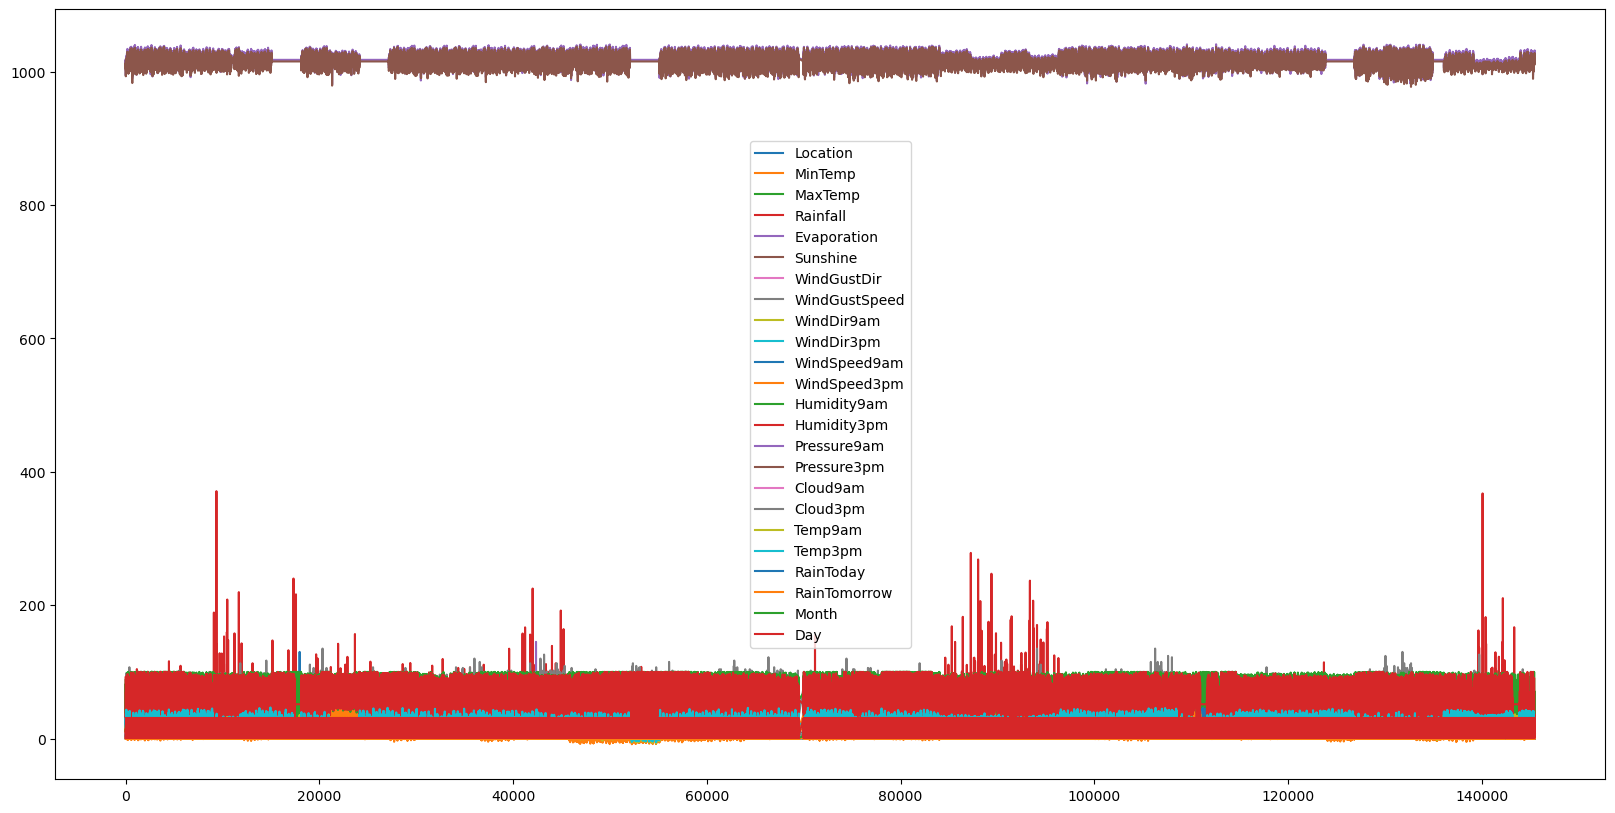

In [14]:
import matplotlib.pyplot as plt

df.plot(figsize=(20, 10))

Performing normalization on columns Pressure9am and Pressure3pm as they are highly variant

In [15]:
import scipy.stats as stats
df['Pressure9am'] = stats.zscore(df['Pressure9am'])
df['Pressure3pm'] = stats.zscore(df['Pressure3pm'])
df['Pressure9am'] *= 10
df['Pressure3pm'] *= 10
min(df['Pressure9am'])

-55.0734086115567

Rechecking using plot again

<AxesSubplot:>

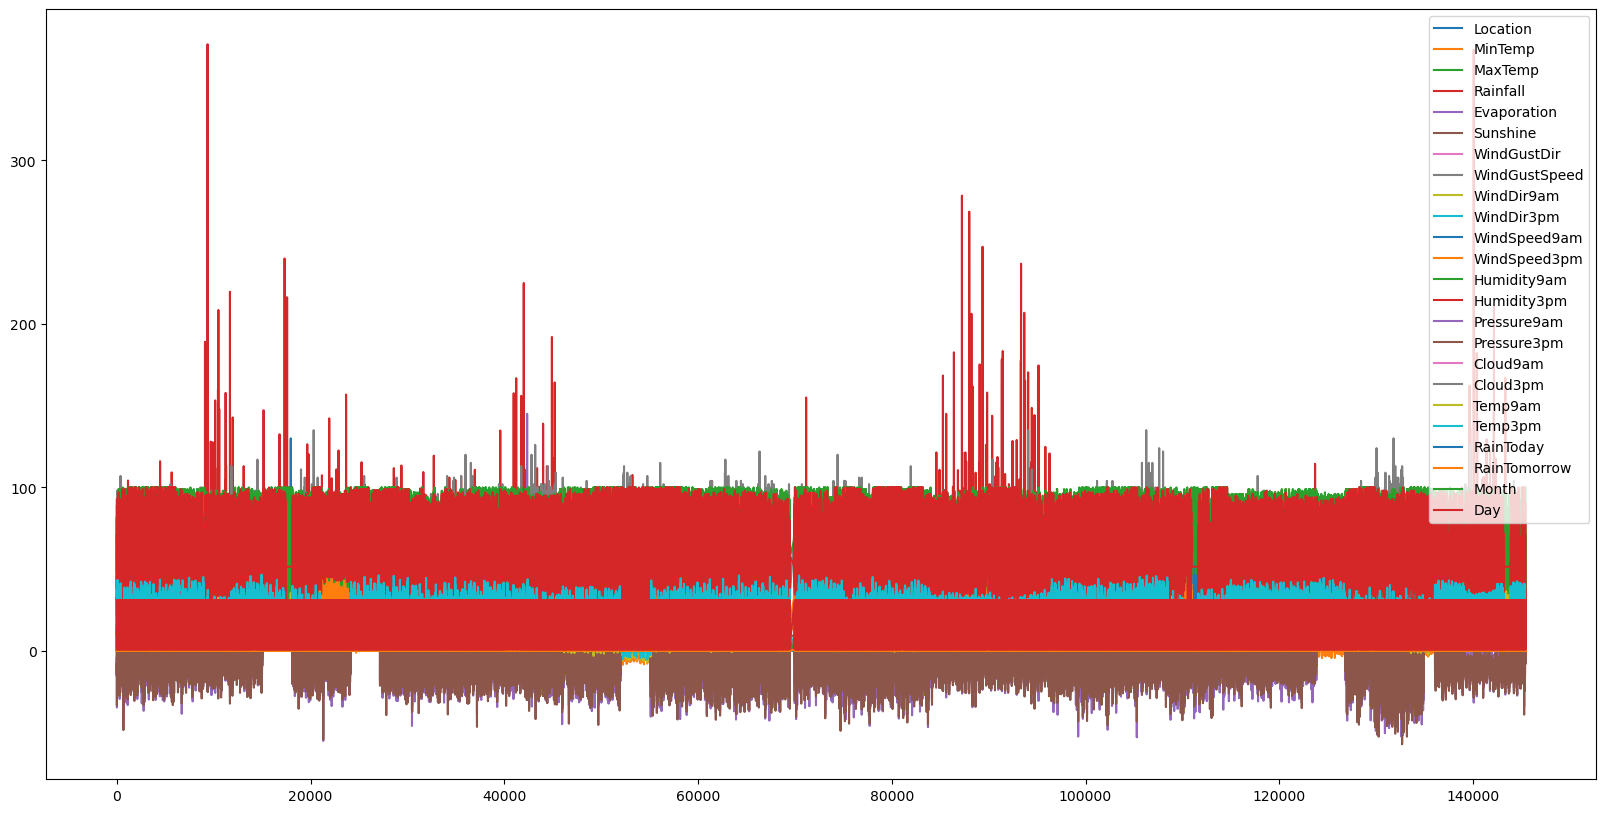

In [16]:
df.plot(figsize=(20, 10))

Correlation matrix using heatmap

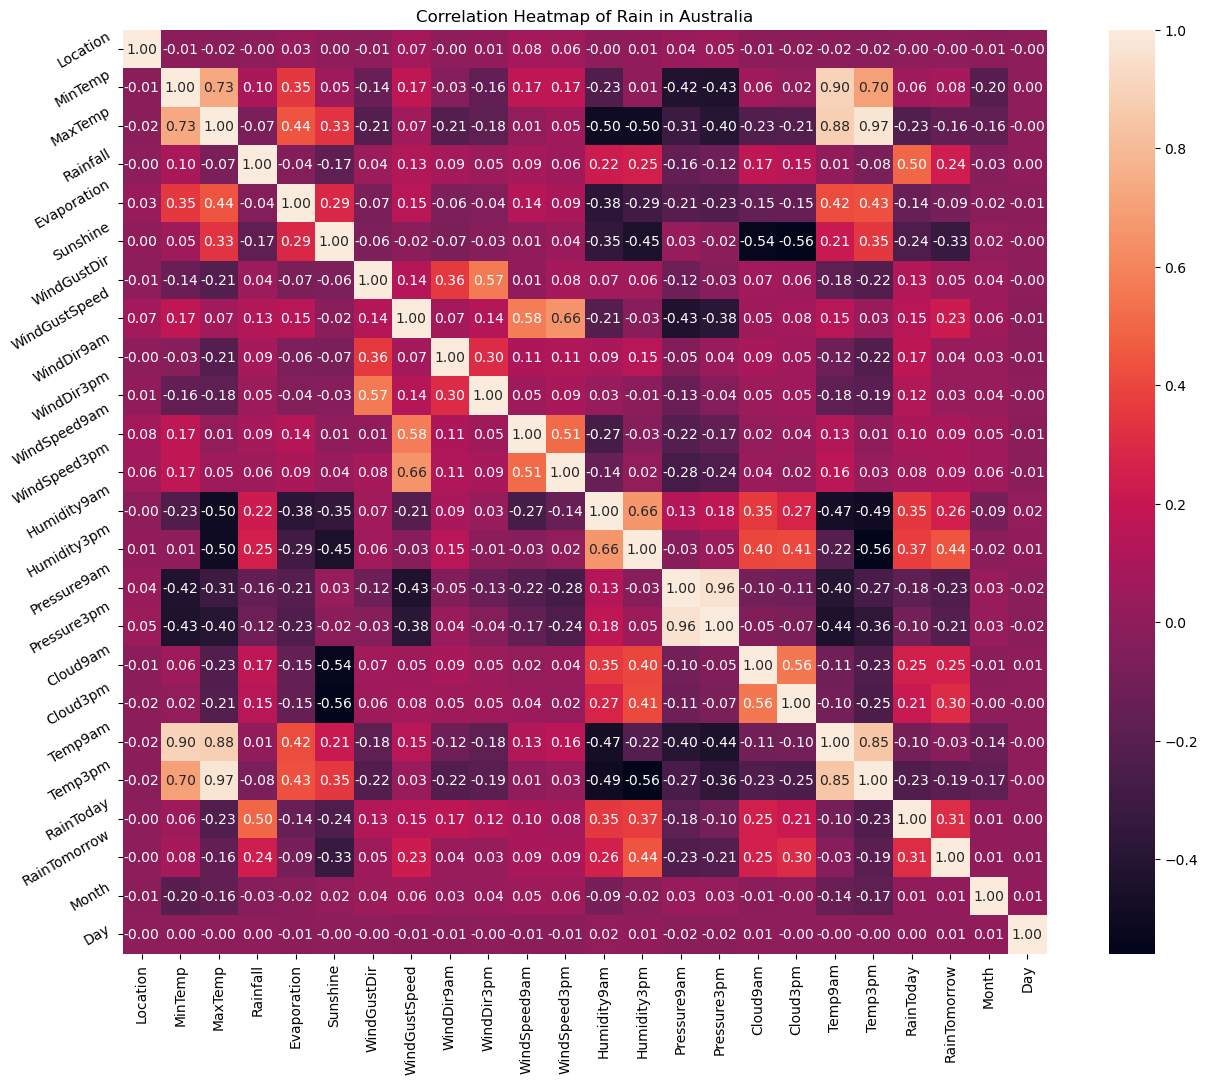

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

Experiments after studying the heatmap

In [18]:
#df.drop('Sunshine',inplace= True,axis=1)
#df.drop('Pressure9am',inplace= True,axis=1)
#df.drop('Pressure3pm',inplace= True,axis=1) 
df.drop('Temp3pm',inplace= True,axis=1) #dropping this column as it has a correlation of 0.97 with Maxtemp3pm and its removal results in improvement of accuracy
#df.drop('Temp9am',inplace= True,axis=1)
#df.drop('Location',inplace= True,axis=1)




### TODO - Outliers

In [19]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,RainToday,RainTomorrow,Month,Day
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,1.421930e+05,1.421930e+05,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,23.740655,12.186400,23.226784,2.349974,5.469824,7.624853,8.059039,39.984292,7.000316,7.788485,...,51.482606,-2.861912e-13,1.685085e-13,4.437189,4.503167,16.987509,0.221213,0.224181,6.402544,15.715084
std,14.237503,6.388924,7.109554,8.423217,3.168114,2.734927,4.694267,13.138385,4.514678,4.546322,...,20.532065,1.000004e+01,1.000004e+01,2.278080,2.104709,6.472166,0.415065,0.417043,3.426506,8.798150
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,-5.507341e+01,-5.710798e+01,0.000000,0.000000,-7.200000,0.000000,0.000000,1.000000,1.000000
25%,11.000000,7.600000,17.900000,0.000000,4.000000,7.624853,4.000000,31.000000,3.000000,4.000000,...,37.000000,-6.157160e+00,-6.372873e+00,3.000000,4.000000,12.300000,0.000000,0.000000,3.000000,8.000000
50%,24.000000,12.000000,22.700000,0.000000,5.469824,7.624853,9.000000,39.000000,7.000000,8.000000,...,51.482606,1.718896e-11,2.245913e-11,4.437189,4.503167,16.800000,0.000000,0.000000,6.000000,16.000000
75%,36.000000,16.800000,28.200000,0.800000,5.469824,8.700000,13.000000,46.000000,11.000000,12.000000,...,65.000000,6.146018e+00,6.198657e+00,6.000000,6.000000,21.500000,0.000000,0.000000,9.000000,23.000000
max,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,15.000000,135.000000,15.000000,15.000000,...,100.000000,3.460638e+01,3.643019e+01,9.000000,9.000000,40.200000,1.000000,1.000000,12.000000,31.000000


Data Preprocessing is complete
We now divide into train and test dataset

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = df.drop(['RainTomorrow'], axis=1)
y = df[['RainTomorrow']]
#print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)
X_train.shape, X_test.shape


((99535, 22), (42658, 22))

## Classification using K-Nearest Neighbours, K = 3

In [25]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#creating our knn classifier model with n = 3
knn_value_3 = KNeighborsClassifier(n_neighbors = 3)
knn_value_3.fit(X_train, np.ravel(y_train,order='C'))


#Estimating the accuracy of knn classifier with 3 knn
print("Accuracy score ->", knn_value_3.score(X_test, y_test))

#creating confusion matrix
y_pred = knn_value_3.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])


Accuracy score -> 0.829504430587463
Confusion matrix
 [[30454  2582]
 [ 4691  4931]]
True Positives(TP) =  30454
True Negatives(TN) =  4931
False Positives(FP) =  2582
False Negatives(FN) =  4691


K-Nearest Neighbours using K = 5

In [28]:

# Creating our KNN classifier model with n = 5
knn_value_5 = KNeighborsClassifier(n_neighbors=5)
knn_value_5.fit(X_train, np.ravel(y_train, order='C'))

# Estimating the accuracy of the KNN classifier with 5 KNN
print("Accuracy score ->", knn_value_5.score(X_test, y_test))

# Creating the confusion matrix
y_pred = knn_value_5.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) =', cm[0, 0])
print('True Negatives(TN) =', cm[1, 1])
print('False Positives(FP) =', cm[0, 1])
print('False Negatives(FN) =', cm[1, 0])


Accuracy score -> 0.8380374138496882
Confusion matrix
 [[30928  2108]
 [ 4801  4821]]
True Positives(TP) = 30928
True Negatives(TN) = 4821
False Positives(FP) = 2108
False Negatives(FN) = 4801


K-Nearest Neighbours using K = 10

In [29]:
#creating our knn classifier model with n = 10
knn_value_10 = KNeighborsClassifier(n_neighbors = 10)
knn_value_10.fit(X_train, np.ravel(y_train,order='C'))

#Estimating the accuracy of knn classifier with 10 knn
print("Accuracy score ->", knn_value_10.score(X_test, y_test))

#creating confusion matrix
y_pred = knn_value_10.predict(X_test)

cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix:-', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.8428430775001172
Confusion matrix:- [[31759  1277]
 [ 5427  4195]]
True Positives(TP) =  31759
True Negatives(TN) =  4195
False Positives(FP) =  1277
False Negatives(FN) =  5427


### Gaussian Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
#creating our Gaussian naive bayes classifier
clf_nb = GaussianNB().fit(X_train, np.ravel(y_train,order='C'))

#Estimating the accuracy of knn classifier with 3 knn
print("Accuracy score ->", clf_nb.score(X_test, y_test))

#creating confusion matrix
y_pred = clf_nb.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.8066013408973698
Confusion matrix
 [[28671  4365]
 [ 3885  5737]]
True Positives(TP) =  28671
True Negatives(TN) =  5737
False Positives(FP) =  4365
False Negatives(FN) =  3885


### Decision Trees (CART)

In [31]:
from sklearn.tree import DecisionTreeClassifier
#creating our Decision Tree Classifier - CART classifier is what is packaged into sklearn
clf_dt = DecisionTreeClassifier().fit(X_train, np.ravel(y_train,order='C'))

#Estimating the accuracy
print("Accuracy score ->", clf_dt.score(X_test, y_test))

#creating confusion matrix
y_pred = clf_dt.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.7848703642927469
Confusion matrix
 [[28296  4740]
 [ 4437  5185]]
True Positives(TP) =  28296
True Negatives(TN) =  5185
False Positives(FP) =  4740
False Negatives(FN) =  4437


### Random Forest(Medium Variance)

In [32]:
from sklearn.ensemble import RandomForestClassifier
#creating a classifier using Random Forest
clf_RF = RandomForestClassifier().fit(X_train, np.ravel(y_train,order='C'))

#Estimating the accuracy
print("Accuracy score ->", clf_RF.score(X_test, y_test))

#creating confusion matrix
y_pred = clf_RF.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.857588260115336
Confusion matrix
 [[31636  1400]
 [ 4675  4947]]
True Positives(TP) =  31636
True Negatives(TN) =  4947
False Positives(FP) =  1400
False Negatives(FN) =  4675


### Extra Trees (Low Variance)

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
#creating a classifier using Extra Forest
clf_ext = ExtraTreesClassifier().fit(X_train, np.ravel(y_train,order='C'))

#Estimating the accuracy
print("Accuracy score ->", clf_ext.score(X_test, y_test))

#creating confusion matrix
y_pred = clf_ext.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.8565568006001218
Confusion matrix
 [[31774  1262]
 [ 4857  4765]]
True Positives(TP) =  31774
True Negatives(TN) =  4765
False Positives(FP) =  1262
False Negatives(FN) =  4857


### Artificial Neural Network

In [34]:
from sklearn.neural_network import MLPClassifier
#creating a classifier using MLP
clf_mlp = MLPClassifier().fit(X_train, np.ravel(y_train,order='C'))

#Estimating the accuracy
print("Accuracy score ->", clf_mlp.score(X_test, y_test))

#creating confusion matrix
y_pred = clf_mlp.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

C:\Users\simra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy score -> 0.854329785737728
Confusion matrix
 [[30901  2135]
 [ 4079  5543]]
True Positives(TP) =  30901
True Negatives(TN) =  5543
False Positives(FP) =  2135
False Negatives(FN) =  4079


### Ensemble techniques: Adaboost

In [35]:
from sklearn.ensemble import AdaBoostClassifier
#creating a classifier using MLP
clf_ada = AdaBoostClassifier(n_estimators=100, learning_rate=1.1).fit(X_train, np.ravel(y_train,order='C'))

#Estimating the accuracy
print("Accuracy score ->", clf_ada.score(X_test, y_test))

#creating confusion matrix
y_pred = clf_ada.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.8479066060293498
Confusion matrix
 [[31294  1742]
 [ 4746  4876]]
True Positives(TP) =  31294
True Negatives(TN) =  4876
False Positives(FP) =  1742
False Negatives(FN) =  4746


### Support Vector Machines

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf_svm = make_pipeline(StandardScaler(), SVC()).fit(X_train, np.ravel(y_train,order='C'))

print("Accuracy score ->", clf_svm.score(X_test, y_test))

#creating confusion matrix
y_pred = clf_svm.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.8547751887102067
Confusion matrix
 [[31820  1216]
 [ 4979  4643]]
True Positives(TP) =  31820
True Negatives(TN) =  4643
False Positives(FP) =  1216
False Negatives(FN) =  4979
